In [36]:
import nemo.collections.asr as nemo_asr
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F



In [37]:
example_file = "../data/compressed_val/ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"
audio, sample_rate = librosa.load(example_file, sr=None)

start_time = 1539
length = 8 * sample_rate
start_sample = int(start_time * sample_rate)
audio1 = audio[..., start_sample:start_sample+length]

ipd.Audio(audio1, rate=sample_rate)

[NeMo W 2024-06-06 23:32:26 nemo_logging:393] /tmp/ipykernel_27879/1312389313.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
      audio, sample_rate = librosa.load(example_file, sr=None)
    
[NeMo W 2024-06-06 23:32:26 nemo_logging:393] /home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
    	Deprecated as of librosa version 0.10.0.
    	It will be removed in librosa version 1.0.
      y, sr_native = __audioread_load(path, offset, duration, dtype)
    


In [42]:
example_file = "../data/compressed_index/ded3d179001b3f679a0101be95405d2c.mp4"
audio, sample_rate = librosa.load(example_file, sr=None)

start_time = 846
length = 8 * sample_rate
start_sample = int(start_time * sample_rate)
audio2 = audio[..., start_sample:start_sample+length]

ipd.Audio(audio2, rate=sample_rate)

[NeMo W 2024-06-06 23:36:28 nemo_logging:393] /tmp/ipykernel_27879/1936338632.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
      audio, sample_rate = librosa.load(example_file, sr=None)
    
[NeMo W 2024-06-06 23:36:28 nemo_logging:393] /home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
    	Deprecated as of librosa version 0.10.0.
    	It will be removed in librosa version 1.0.
      y, sr_native = __audioread_load(path, offset, duration, dtype)
    


In [39]:
def get_embedding(audio):
    audio_tensor = torch.tensor(audio).unsqueeze(0)
    signal_length = torch.tensor([audio_tensor.shape[1]])
    print(signal_length)

    # Move the model to the GPU
    model = nemo_asr.models.EncDecHybridRNNTCTCBPEModel.from_pretrained(model_name="nvidia/stt_ru_fastconformer_hybrid_large_pc").eval()
    model = model.to("cuda")

    # Process the signal using the model's preprocessor
    processed_signal, processed_signal_length = model.preprocessor(input_signal=audio_tensor.to("cuda"), length=signal_length.to("cuda"))
    print(processed_signal_length)

    # Ensure processed_signal_length is a tensor with the correct shape
    print(processed_signal.shape, processed_signal_length.shape)
    plt.imshow(processed_signal.squeeze(0).detach().cpu().numpy())
    plt.show()

    # Run the encoder with no gradient calculation
    with torch.no_grad():
        encoder_output, encoder_output_length = model.encoder(audio_signal=processed_signal, length=processed_signal_length)

    print(encoder_output.shape, encoder_output_length.shape)
    return encoder_output

tensor([352800])
[NeMo I 2024-06-06 23:32:53 nemo_logging:381] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2024-06-06 23:32:54 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath:
    - - /data/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 32
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    is_tarred: true
    tarred_audio_filepaths:
    - - /data/audio__OP_0..1023_CL_.tar
    shuffle_n: 2048
    bucketing_strategy: synced_randomized
    bucketing_batch_size: null
    is_concat: false
    concat_sampling_technique: random
    concat_sampling_probabilities: ''
    
[NeMo W 2024-06-06 23:32:54 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to

[NeMo I 2024-06-06 23:32:54 nemo_logging:381] PADDING: 0


[NeMo W 2024-06-06 23:32:54 nemo_logging:393] /home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
      warnings.warn("dropout option adds dropout after all but last "
    


[NeMo I 2024-06-06 23:32:54 nemo_logging:381] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2024-06-06 23:32:54 nemo_logging:381] Model EncDecHybridRNNTCTCBPEModel was successfully restored from /home/jood/.cache/huggingface/hub/models--nvidia--stt_ru_fastconformer_hybrid_large_pc/snapshots/9d65ebcc12bedae82b23ceadae4e8abb9fbd27a0/stt_ru_fastconformer_hybrid_large_pc.nemo.
tensor([2206], device='cuda:0')
torch.Size([1, 80, 2206]) torch.Size([1])


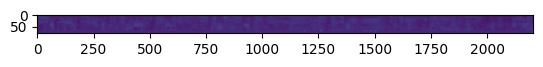

torch.Size([1, 512, 276]) torch.Size([1])
tensor([352800])
[NeMo I 2024-06-06 23:32:55 nemo_logging:381] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2024-06-06 23:32:55 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath:
    - - /data/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 32
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    is_tarred: true
    tarred_audio_filepaths:
    - - /data/audio__OP_0..1023_CL_.tar
    shuffle_n: 2048
    bucketing_strategy: synced_randomized
    bucketing_batch_size: null
    is_concat: false
    concat_sampling_technique: random
    concat_sampling_probabilities: ''
    
[NeMo W 2024-06-06 23:32:55 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to

[NeMo I 2024-06-06 23:32:55 nemo_logging:381] PADDING: 0
[NeMo I 2024-06-06 23:32:56 nemo_logging:381] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2024-06-06 23:32:56 nemo_logging:381] Model EncDecHybridRNNTCTCBPEModel was successfully restored from /home/jood/.cache/huggingface/hub/models--nvidia--stt_ru_fastconformer_hybrid_large_pc/snapshots/9d65ebcc12bedae82b23ceadae4e8abb9fbd27a0/stt_ru_fastconformer_hybrid_large_pc.nemo.
tensor([2206], device='cuda:0')
torch.Size([1, 80, 2206]) torch.Size([1])


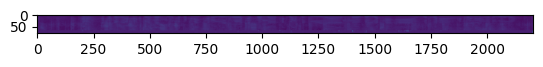

torch.Size([1, 512, 276]) torch.Size([1])


In [40]:
emb1 = get_embedding(audio1)
emb2  = get_embedding(audio2)

In [41]:
F.cosine_similarity(emb1.flatten().unsqueeze(0), emb2.flatten().unsqueeze(0))

tensor([0.9363], device='cuda:0')